In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\names-by-nationality.csv")
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df.shape

(3709, 3)

In [3]:
df.head()

,name,sex,nationality
0,aarav,male,indian
1,aaryan,male,indian
2,abha,female,indian
3,abhay,male,indian
4,abhilash,male,indian


In [4]:
df.columns

Index(['name', 'sex', 'nationality'], dtype='object')

In [5]:
df['nationality'].unique()

array(['indian', 'russian', 'japanese', 'african', 'german', 'french',
       'american', 'saudi'], dtype=object)

In [6]:
df.groupby('nationality').size()

nationality
african     520
american    612
french      584
german      334
indian      576
japanese    622
russian     142
saudi       319
dtype: int64

<Axes: xlabel='nationality', ylabel='count'>

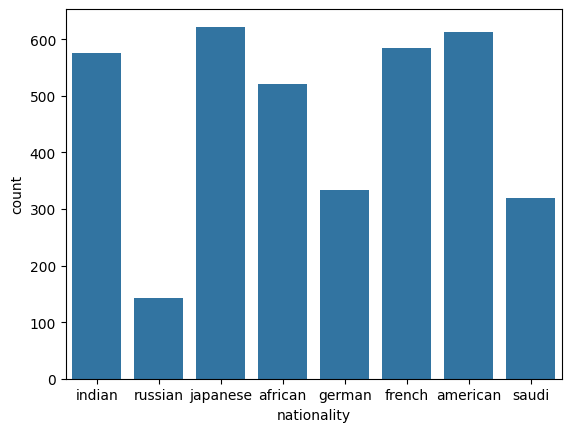

In [7]:
sns.countplot(x='nationality',data=df)

In [8]:
df.isnull().any() 

name           False
sex            False
nationality    False
dtype: bool

In [9]:
df.isnull().any() 

name           False
sex            False
nationality    False
dtype: bool

<Axes: xlabel='nationality'>

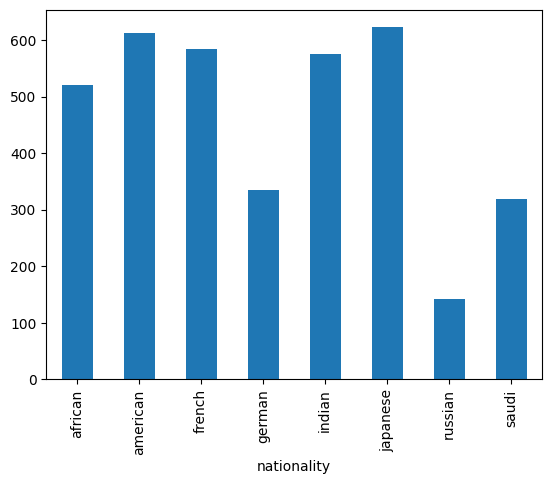

In [10]:
df.groupby('nationality')['name'].size().plot(kind='bar')#,figsize=(20,10)

In [11]:
Xfeatures = df['name']
ylabels= df['nationality']
cv = CountVectorizer()
X= cv.fit_transform(Xfeatures) 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.33,random_state=42)

In [13]:
clf = MultinomialNB().fit(x_train, y_train)
clf.predict(X[1110])

array(['american'], dtype='<U8')

In [14]:
sample1 = ["Laxie"]
vect1 = cv.transform(sample1).toarray()
clf.predict(vect1)

array(['american'], dtype='<U8')

In [15]:
sample2= ["khan","Satit","Silko",'Sila','Braun','Kozakura']
vect2 = cv.transform(sample2).toarray()
clf.predict(vect2)

array(['indian', 'saudi', 'african', 'american', 'german', 'japanese'],
      dtype='<U8')